**Reading Dataset**

In [1]:
import numpy as np 
import pandas as pd 

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# List files available
import os
print(os.listdir('C:\\Users\\ddwu0\\OneDrive\\桌面\\'))

['.ipynb_checkpoints', '1205.py', '20180606個人資料提供同意書.pdf', 'AIot照片集', 'Anaconda Navigator (anaconda3).lnk', 'Android Studio.lnk', 'archive', 'Arduino IDE.lnk', 'building', 'desktop.ini', 'Discord.lnk', 'ECV-IA-D-CW100-02_應徵人員資料表v1.2_20230206[4192].docx', 'face-mask-detection-faster-r-cnn-pytorch.ipynb', 'face-mask-detection-faster-rcnn-pytorch.ipynb', 'FinalExam_B0928009.zip', 'GeForce Experience.lnk', 'Grammarly.lnk', 'HW1_B0928009.zip', 'install_sahi_pro_v970_20220511', 'LINE.lnk', 'Microsoft Edge.lnk', 'Microsoft Teams classic (work or school).lnk', 'min_project', 'model', 'model.pth', 'model_0214.pth', 'My little things', 'object-detection-using-pytorch.ipynb', 'pgAdmin 4 v6.lnk', 'py', 'python', 'pytorch-pretrained-fasterrcnn.ipynb', 'seproject', 'sketch_feb16a', 'sketch_nov24a', 'test', 'Ubisoft Connect.lnk', 'Visual Studio 2019.lnk', 'Visual Studio Code.lnk', 'Zoom.lnk', '作業系統', '作業系統筆記.docx', '大專資訊競賽', '大腦筆記', '學生證.docx', '宜蘭花蓮行.docx', '家族史.docx', '實習', '放射影像.docx', '樣形', '樣形式別

In [3]:
train=pd.read_csv("C:\\Users\\ddwu0\\OneDrive\\桌面\\樣形\\train.csv")
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test=pd.read_csv("C:\\Users\\ddwu0\\OneDrive\\桌面\\樣形\\test.csv")
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


**EDA**

In [5]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
#Missing values in test set
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [7]:
train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [8]:
train['target'].value_counts().index

Index([0, 1], dtype='int64', name='target')

In [9]:
train[train['target']==1]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [10]:
train[train['target']==1]['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

In [11]:
disaster_tweets=train[train['target']==1]['text']
disaster_tweets.values[1]

'Forest fire near La Ronge Sask. Canada'

In [12]:
train[train['target']==0]['text']

15                                         What's up man?
16                                          I love fruits
17                                       Summer is lovely
18                                      My car is so fast
19                           What a goooooooaaaaaal!!!!!!
                              ...                        
7581    @engineshed Great atmosphere at the British Li...
7582    Cramer: Iger's 3 words that wrecked Disney's s...
7584    These boxes are ready to explode! Exploding Ki...
7587                                   Sirens everywhere!
7593    I just heard a really loud bang and everyone i...
Name: text, Length: 4342, dtype: object

In [13]:
non_disaster_tweets=train[train['target']==0]['text']
non_disaster_tweets.values[1]

'I love fruits'

In [14]:
train['keyword'].value_counts()[:20]

keyword
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
famine         39
Name: count, dtype: int64

In [15]:
train['keyword'].value_counts()[:20].index

Index(['fatalities', 'deluge', 'armageddon', 'sinking', 'damage', 'harm',
       'body%20bags', 'outbreak', 'evacuate', 'fear', 'collided', 'siren',
       'twister', 'windstorm', 'sinkhole', 'sunk', 'hellfire', 'weapon',
       'weapons', 'famine'],
      dtype='object', name='keyword')

<Axes: xlabel='count', ylabel='keyword'>

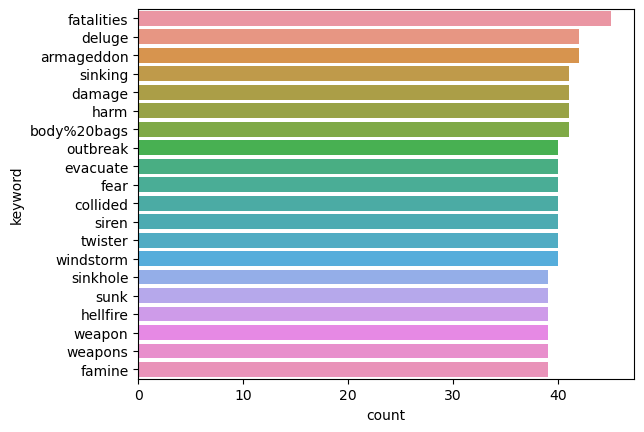

In [16]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20],
            orient='h')

In [17]:
train.loc[train['text'].str.contains('disaster', na=False, case=False)].target.value_counts()

target
1    102
0     40
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='location'>

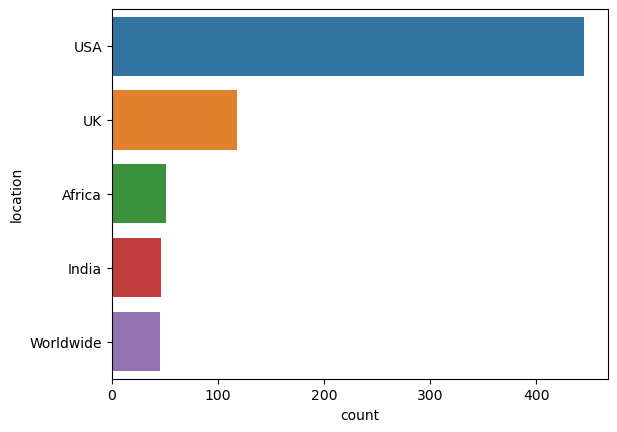

In [18]:
# Replacing the ambigious locations name with Standard names
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

sns.barplot(y=train['location'].value_counts()[:5].index,x=train['location'].value_counts()[:5],
            orient='h')

In [19]:

train['text'][:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [20]:
def clean_text(text):
    
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text 

train['text']=train['text'].apply(lambda x :clean_text(x))
test['text']=test['text'].apply(lambda x :clean_text(x))

train['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

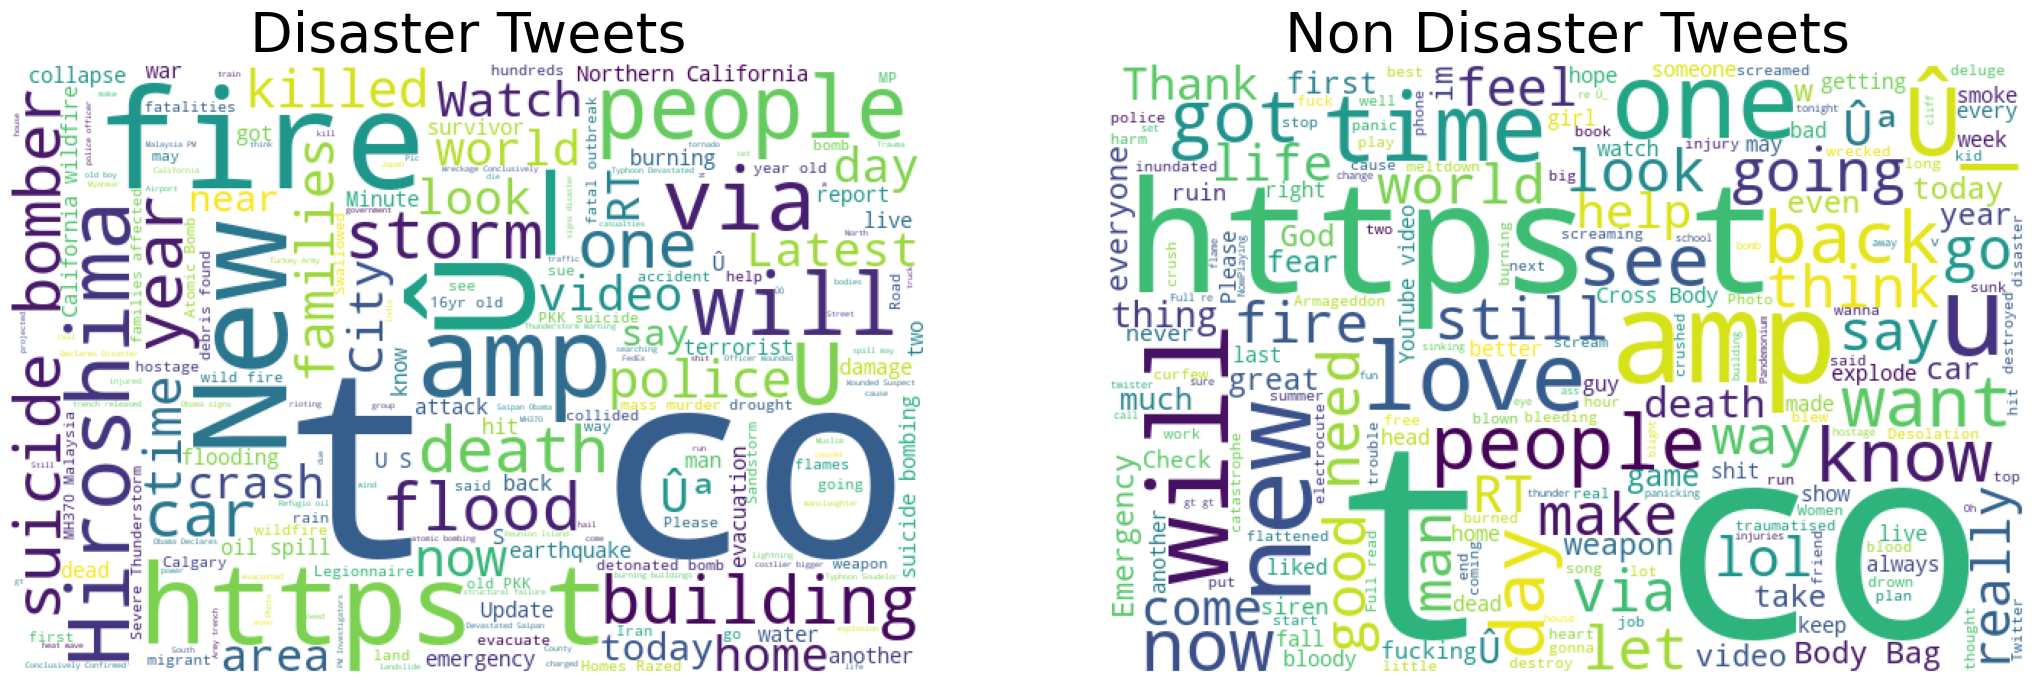

In [21]:
from wordcloud import WordCloud

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloud1=WordCloud(background_color='white',width=600,height=400).generate(" ".join(disaster_tweets))

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

## prework

* load basic dependencies
* load data
* check data

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:\\Users\\ddwu0\\OneDrive\\桌面\\樣形'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\ddwu0\OneDrive\桌面\樣形\data mining書面.docx
C:\Users\ddwu0\OneDrive\桌面\樣形\EDA-1.zip
C:\Users\ddwu0\OneDrive\桌面\樣形\EDA-2.zip
C:\Users\ddwu0\OneDrive\桌面\樣形\EDA.ipynb
C:\Users\ddwu0\OneDrive\桌面\樣形\sample_submission.csv
C:\Users\ddwu0\OneDrive\桌面\樣形\Sequential.zip
C:\Users\ddwu0\OneDrive\桌面\樣形\submission.csv
C:\Users\ddwu0\OneDrive\桌面\樣形\test.csv
C:\Users\ddwu0\OneDrive\桌面\樣形\TF_IDF_CounterVectorizer.zip
C:\Users\ddwu0\OneDrive\桌面\樣形\train.csv


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

In [24]:
tweet = pd.read_csv("C:\\Users\\ddwu0\\OneDrive\\桌面\\樣形\\train.csv")
test = pd.read_csv("C:\\Users\\ddwu0\\OneDrive\\桌面\\樣形\\test.csv")
submission = pd.read_csv("C:\\Users\\ddwu0\\OneDrive\\桌面\\樣形\\sample_submission.csv")
tweet.shape, test.shape, submission.shape

((7613, 5), (3263, 4), (3263, 2))

In [25]:
# check data
def show_info(data, is_matrix_transpose=False):
    print('\n' * 2)
    # basic shape
    print('data shape is: {}   sample number {}   attribute number {}\n'.format(data.shape, data.shape[0], data.shape[1]))
    # attribute(key)
    print('data columns number {}  \nall columns: {}\n'.format(len(data.columns) ,data.columns))
    # value's null
#     print('data all attribute count null:\n', data.isna().sum())
    # data value analysis and data demo
#     if is_matrix_transpose:
#         print('data value analysis: ', data.describe().T)
#         print('data demo without matrix transpose: ', data.head().T)
#     else:
#         print('data value analysis: ', data.describe())
#         print('data demo without matrix transpose: ', data.head())
show_info(tweet)
show_info(test)
show_info(submission)




data shape is: (7613, 5)   sample number 7613   attribute number 5

data columns number 5  
all columns: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')




data shape is: (3263, 4)   sample number 3263   attribute number 4

data columns number 4  
all columns: Index(['id', 'keyword', 'location', 'text'], dtype='object')




data shape is: (3263, 2)   sample number 3263   attribute number 2

data columns number 2  
all columns: Index(['id', 'target'], dtype='object')



## EDA


### plot

* label
    * classification
* value
    * length of per words
    * number of words in per text
    * average of words in per text

<Axes: xlabel='target'>

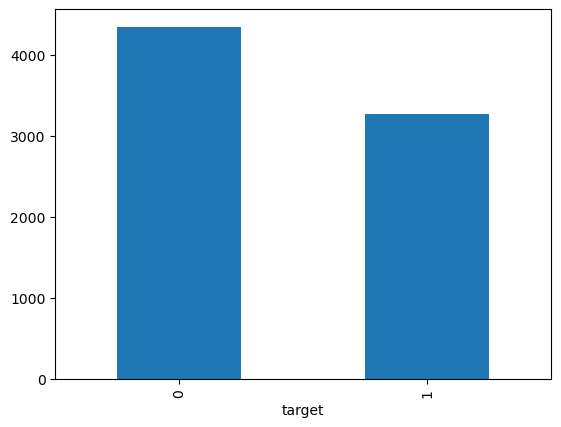

In [26]:
# plot -> label -> classification
tweet.target.value_counts().plot.bar()

In [27]:
# 增添长度属性到 true and not ==> 利用apply 来应用
def length(text):
    return len(text)
# new attribute 'length' in train 
tweet['length'] = tweet['text'].apply(length)
show_info(tweet)




data shape is: (7613, 6)   sample number 7613   attribute number 6

data columns number 6  
all columns: Index(['id', 'keyword', 'location', 'text', 'target', 'length'], dtype='object')



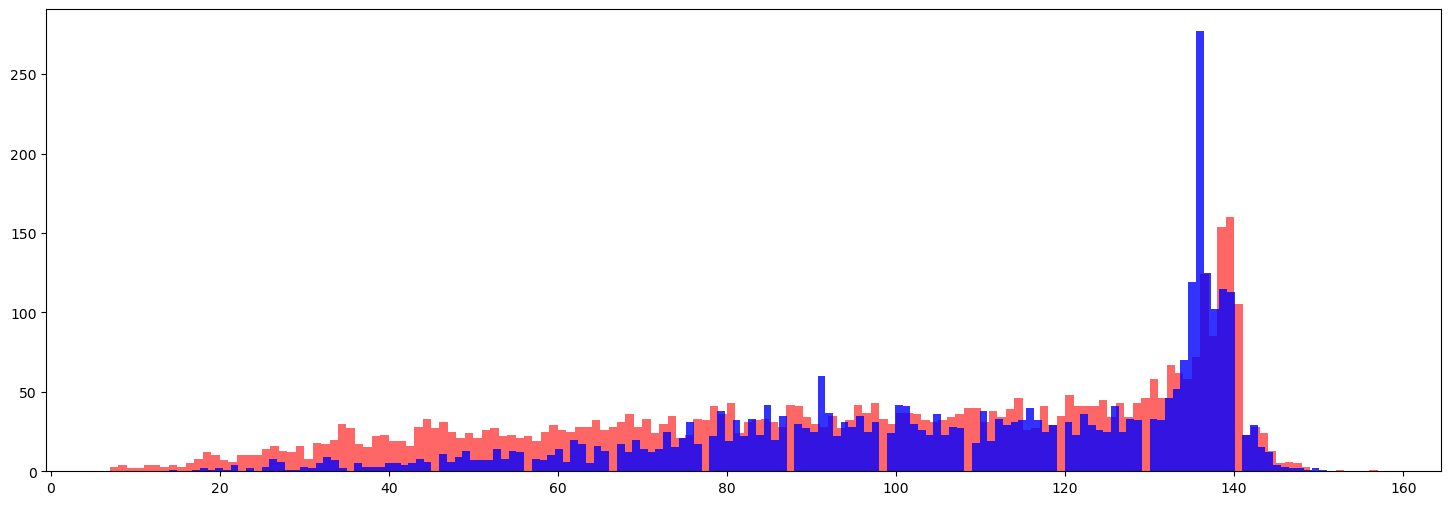

In [28]:
# plot -> value -> length
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(tweet[tweet['target'] == 0]['length'], alpha=0.6, bins=bins, label='Not', color='red')
plt.hist(tweet[tweet['target'] == 1]['length'], alpha=0.8, bins=bins, label='Real', color='blue')
plt.show()